In [1]:
from fact.io import read_h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = read_h5py("data/gamma_test_dl3.hdf5", key="events")
crab = read_h5py("data/open_crab_sample_dl3.hdf5", key="events")

gamma_test = test["gamma_prediction"] >= 0.8
gamma_crab = crab["gamma_prediction"] >= 0.8

theta2_s = crab["theta_deg"][gamma_crab].to_numpy()**2
theta2_bg = crab[["theta_deg_off_1","theta_deg_off_2","theta_deg_off_3","theta_deg_off_4","theta_deg_off_5"]][gamma_crab].to_numpy().flatten()**2
print(theta2_bg)

[2.22590251 2.31385265 1.36319884 ... 0.81825774 1.98526513 3.75594856]


(array([73, 83, 66, 66, 55, 35, 56, 52, 33, 49, 40, 37, 38, 35, 37, 36, 33,
       28, 29, 27]), array([1.06304969e-05, 1.25793523e-03, 2.50523996e-03, 3.75254469e-03,
       4.99984942e-03, 6.24715415e-03, 7.49445888e-03, 8.74176361e-03,
       9.98906834e-03, 1.12363731e-02, 1.24836778e-02, 1.37309825e-02,
       1.49782873e-02, 1.62255920e-02, 1.74728967e-02, 1.87202014e-02,
       1.99675062e-02, 2.12148109e-02, 2.24621156e-02, 2.37094204e-02,
       2.49567251e-02]))


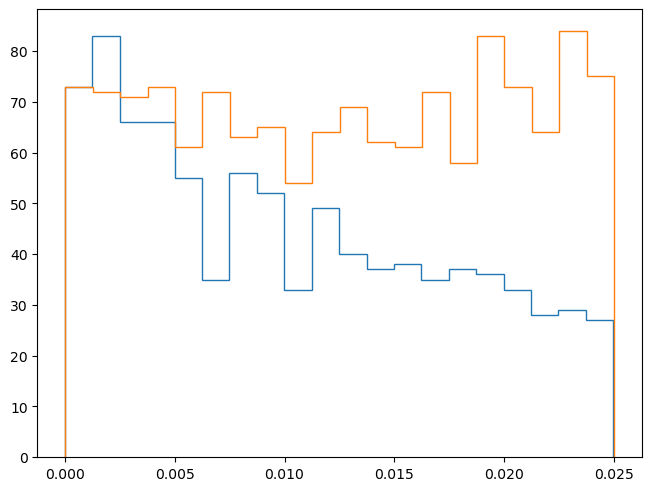

In [3]:
hist_s = np.histogram(theta2_s[theta2_s<=0.025], bins=20)
hist_bg = np.histogram(theta2_bg[theta2_bg<=0.025], bins=20)
print(hist_s)

fig, ax = plt.subplots(constrained_layout=True)

#ax.bar(hist_s[1][:-1],hist_s[0])
#ax.bar(hist_bg[1][:-1],hist_bg[0]/5)

ax.hist(theta2_s[theta2_s<=0.025], bins=20, histtype="step")
ax.hist(theta2_bg[theta2_bg<=0.025], bins=20, histtype="step")


plt.show()

In [4]:
N_on = len(theta2_s[theta2_s<=0.025])
N_off = len(theta2_bg[theta2_bg<=0.025])
print(N_on,N_off)

alpha = 0.2

S = np.sqrt(2) * np.sqrt(N_on * np.log( (1+alpha)/alpha * N_on/(N_on + N_off)) + N_off * np.log((1+alpha) * N_off/(N_on + N_off)))
S

908 1369


26.275871877931035

In [113]:
E_true = test["corsika_event_header_total_energy"][gamma_test].to_numpy()
E_pred = test["gamma_energy_prediction"][gamma_test].to_numpy()
print(len(E_pred),len(E_true))

bins_true=np.logspace(2.3,4.7,21)
bins_pred=np.logspace(2.3,4.7,21)

hist_E_true, bins_E_true = np.histogram(E_true, bins_true)#2.7,4.2
hist_E_pred, bins_E_pred = np.histogram(E_pred, bins_pred)
print(hist_E_true,hist_E_pred)
print(np.sum(hist_E_pred), np.sum(hist_E_true))


214626 214626
[  111   441  1982  8294 23700 38333 39232 30746 22644 16091 11111  7836
  5259  3528  2197  1434   856   439   262   130] [    0     0     0    32 25138 50204 40897 31030 22209 15299 10371  7208
  4925  3051  1901  1246   708   333    72     2]
214626 214626


214626.0


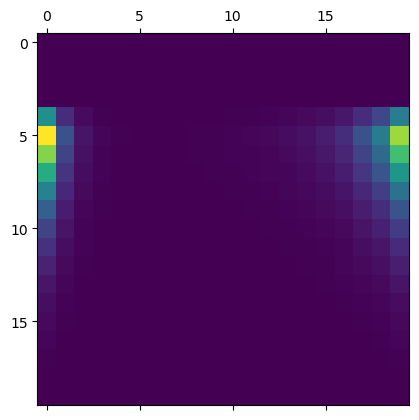

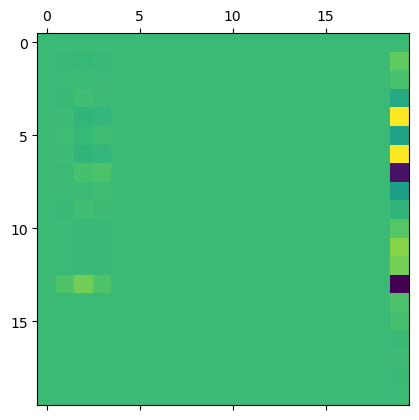

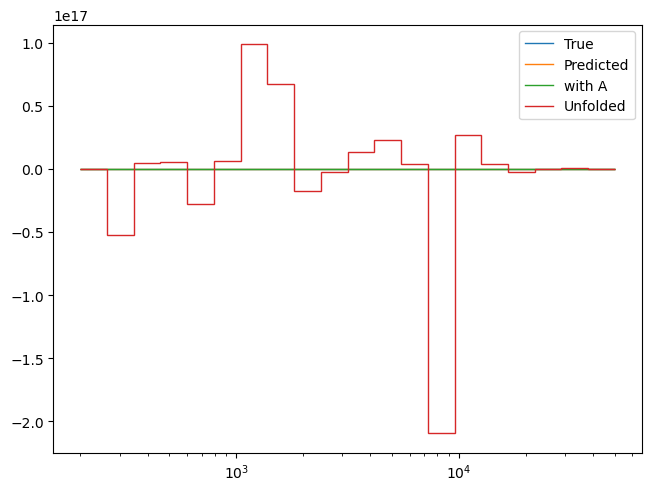

In [148]:
A = np.outer(hist_E_pred,1/hist_E_true)/len(hist_E_true)
g = A@hist_E_true
print(np.sum(g))

A_inv = np.linalg.pinv(A,rcond=0)
u,s,vh = np.linalg.svd(A)

svd = vh.conj().T @ np.diag(1/s) @ u.conj().T
plt.matshow(A)
plt.matshow(A_inv)
plt.matshow(svd)

fig, ax = plt.subplots(constrained_layout=True)

ax.stairs(hist_E_true,bins_E_true,label="True")
ax.stairs(hist_E_pred,bins_E_pred,label="Predicted")
ax.stairs(g,bins_E_pred,label="with A")
ax.stairs(A_inv@hist_E_pred,bins_E_true,label="Unfolded")

ax.set_xscale("log")
ax.legend(loc="best")

plt.show()